# Task - 1 Prediction using Supervised ML

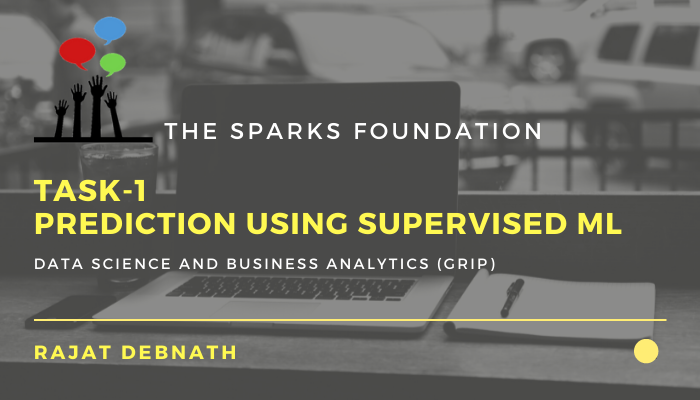

In [1]:
from IPython import display
display.Image("Image.png")

# 1. Importing The Libraries & Data 

In [2]:
import numpy as np   #Process numerical operations
import pandas as pd  #For data analysis
import matplotlib.pyplot as plt #For visualizing the data
%matplotlib inline

In [3]:
# Import the CSV file from the given link:
url = r"http://bit.ly/w-data"
df = pd.read_csv(url)
print("Imported successfully")
df.head(8)

Imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


# 2. Inspecting The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see here, there are 25 entries or rows and 2 columns.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here we can see the count of dataset, its mean, standard deviation, percentile and max value.

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The above shows that the given data is a Linear Correlation.

# 3. Visualizing Input Data

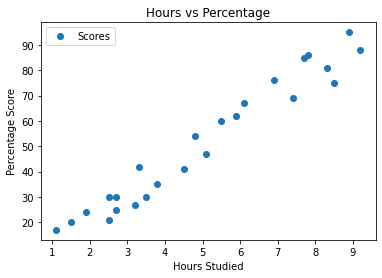

In [7]:
# Now we will plot the given data on a chart with X-axis as Hours Studied and Y-axis as Percentage Score
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
# Preprocessing The Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
# Split the dataset into training and testing using Scikit-Learn:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# 4. Model Training

In [9]:
# We will train our algorithm using simple Linear Regression model from scikit-learn library
from sklearn.linear_model import LinearRegression  
reg= LinearRegression()  
reg.fit(X_train, y_train) 
print("Complete Training.")

Complete Training.


# 5. Testing The Model

In [10]:
# Now we test the model performance on test data
y_pred = reg.predict(X_test) 
#Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# 6. Visualizing the regression line on the data

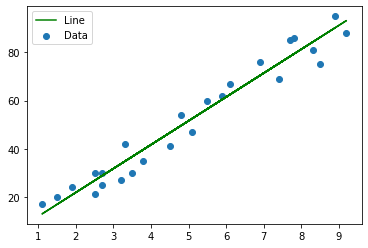

In [11]:
# Now we plot the regression line 
line = reg.coef_*X+reg.intercept_
plt.scatter(X,y,label='Data')
plt.plot(X, line,label='Line',color='g')
plt.legend()

In [12]:
# Accuracy of the model
print('Accuracy:',reg.score(X_test,y_test))
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Accuracy: 0.9454906892105355
Mean Absolute Error: 4.183859899002975


# 7.Making Predictions

In [13]:
# Real time input and result
hours = float(input())
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

8.5
No of Hours = 8.5
Predicted Score = 86.25874012689368


Here we can see that if a student studies for 8.5 hours his predicted score will be 86.25%

# 8.Comparing Actual result to the Predicted Model result

In [14]:
# Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


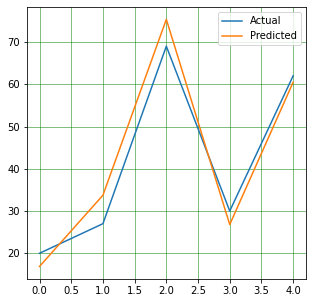

In [15]:
# Line graph showing the difference between actual and predicted value

df.plot(kind='line',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

# 9. Evaluating the model

In [16]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict([[hours]])
print("Hours Studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours Studied = 9.25
Predicted Score = 93.69173248737535


Here we can see that if a student studies 9.25 hours his predicted score is 93.69%

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355


# The above model clearly shows that if a student studied for 9.25 hours/day then the student can get a score of 92.38%